import numpy as np
import scipy
from scipy import stats

In [6]:
# !unzip PA12\ -\ Student\ Data.zip

In [7]:
n = 50
cloud = 50*np.random.rand(3, n)
# print(cloud)

T = 50*np.random.rand(3, 1)
# print(T)

R = stats.special_ortho_group.rvs(3)
# print(R)
# print(np.linalg.det(R))

N = np.random.rand(3, n)
# print(N)

tran = R @ (cloud - get_centroid(cloud)) + (T + get_centroid(cloud)) + N
# print(tran)

In [5]:
def get_centroid(points):
    return np.mean(points, 1, keepdims=True)

def get_H(p, tran_p):
    p_1 = p - get_centroid(p)
    tran_p_1 = tran_p - get_centroid(tran_p)
    H = p_1 @ tran_p_1.T
    return H

def get_R_hat(p, tran_p):
    H = get_H(p, tran_p)
    U, S, VT = scipy.linalg.svd(H)
    R_hat = (U @ VT).T
    
    # correction if resulting matrix is a reflection
    if np.linalg.det(R_hat) < 0:
        VT[2] = -VT[2]
        R_hat = (U @ VT).T
    
    return R_hat

def get_T_hat(p, tran_p):
    p_c = get_centroid(p)
    tran_p_c = get_centroid(tran_p)
    T_hat = tran_p_c - p_c
    return T_hat

def get_Registration(p, tran_p):
    R_hat = get_R_hat(p, tran_p)
    T_hat = get_T_hat(p, tran_p)
    
    F_D = np.concatenate((R_hat, T_hat), 1)
    F_D = np.concatenate((F_D, np.array([[0,0,0,1]])))
    
    return F_D

In [9]:
print(cloud)

# R_hat, T_hat = get_Registration(cloud, tran)
# tran_hat = R_hat @ (cloud - get_centroid(cloud)) + (T_hat + get_centroid(cloud))
# print(R)
# print(R_hat)
# print(T_hat)
# diff = (tran_hat - tran)**2

# print(diff.sum())

[[26.34467266 33.24964055 48.27790362 17.1107523  45.8825792  44.14989771
  39.45193513 24.30871494 44.08741573 32.93591327 40.4823297  34.54455293
  19.36873798  1.07606627 25.86379922 24.44763041 11.25199864 25.09702195
  17.19665707 30.25025984 13.28658243 21.25347133  0.28484652 17.18762453
  47.76003707 27.57893859 22.4499728  46.56020287  7.40005168 37.46009688
   1.4892462  10.4742811  13.65534323  7.68800471 14.27314668 46.49810474
  38.71921831 31.75678693 27.83029188 10.29356752 46.24789063  2.94041793
  43.02061911  2.71914671 12.68523558 23.7158122  35.08455161 42.32523397
  34.96441072  4.71521934]
 [ 9.75739023 12.85023566 41.26506805 22.53965678 13.92736029  8.96318728
   4.88108016  5.6202222  14.82954851 45.76380158 39.33288688  3.065893
  33.76920998 21.61114544 20.1980516  17.88688972 35.10026361 45.80854044
   5.99387582 41.66494037 43.98399697 27.28270542 21.08010734 27.06036471
  25.36075235  5.7287444  46.19697649 21.07093518 32.88861886 26.22321604
  34.36224748

In [3]:
import pandas as pd
import numpy as np

def calbody_data(filepath):
    data = pd.read_csv(filepath, header=None,names=["x", "y", "z", np.nan])
    N_D = int(data["x"][0])
    N_A = int(data["y"][0])
    N_C = int(data["z"][0])

    d = np.array(data[["x", "y", "z"]][1:1 + N_D])
    a = np.array(data[["x", "y", "z"]][1 + N_D : 1 + N_D + N_A])
    c = np.array(data[["x", "y", "z"]][1 + N_D + N_A :])
    return d, a, c

def calreading_data(filepath):
    '''
        Takes a filepath
        
        Returns 3 arrays:
            first array consists of of N_frames frames, each frame containing N_D measurements
            second array consists of of N_frames frames, each frame containing N_A measurements
            third array consists of of N_frames frames, each frame containing N_C measurements
    '''
    size = pd.read_csv(filepath, header=None,names=["D", "A", "C", "Frame", np.nan], nrows = 1)
    N_D = int(size["D"][0])
    N_A = int(size["A"][0])
    N_C = int(size["C"][0])
    N_Frames = int(size["Frame"][0])
    
    data = pd.read_csv(filepath, header=None,names=["x", "y", "z"], skiprows = [0])
    data = np.array(data[["x", "y", "z"]])
    by_frame = np.reshape(data, (N_Frames, N_D + N_A + N_C, 3))
    
    d = by_frame[:, :N_D]
    a = by_frame[:, N_D:N_D+N_A]
    c = by_frame[:, N_D+N_A:]

    return d, a, c


def empivot_data(filepath):
    '''
        Takes a filepath
        
        Returns an array of N_frames frames, each fram containing N_G measurements
    '''
    size = pd.read_csv(filepath, header=None,names=["G", "Frame", np.nan], nrows = 1)
    N_G = int(size["G"][0])
    N_Frames = int(size["Frame"][0])
    
    data = pd.read_csv(filepath, header=None,names=["x", "y", "z"], skiprows = [0])
    g = np.array(data[["x", "y", "z"]])
    g = np.reshape(g, (N_Frames, N_G, 3))
    
    return g

def optpivot_data(filepath):
    '''
        Takes a filepath
        
        Returns 2 arrays:
            first array consists of of N_frames frames, each frame containing N_D measurements
            second array consists of of N_frames frames, each frame containing N_H measurements
    '''
    size = pd.read_csv(filepath, header=None,names=["D", "H", "Frame", np.nan], nrows = 1)
    N_D = int(size["D"][0])
    N_H = int(size["H"][0])
    N_Frames = int(size["Frame"][0])
    
    data = pd.read_csv(filepath, header=None,names=["x", "y", "z"], skiprows = [0])
    data = np.array(data[["x", "y", "z"]])
    by_frame = np.reshape(data, (N_Frames, N_D + N_H, 3))
    
    d = by_frame[:, :N_D]
    h = by_frame[:, N_D:]

    return d, h

In [297]:
# HW Number 1


D, A, C = calreading_data("./programs/data/pa2-debug-f-calreadings.txt")
d, a, c = calbody_data("./programs/data/pa2-debug-f-calbody.txt")


a_c = a.T - get_centroid(a.T)
c_c = c.T - get_centroid(c.T)
c_homo = np.concatenate((c_c, np.ones((1, c_c.shape[1]))))

C_expect = []

for i in range(D.shape[0]):
    F_D = get_Registration(d.T, D[i].T)
    F_A = get_Registration(a_c, A[i].T)
    C_hat = np.linalg.inv(F_D) @ F_A @ c_homo
    C_expect.append(C_hat[:3].T)
    

C_expect = np.array(C_expect)
N_frames, N_C, _ = C_expect.shape
C_expect = np.reshape(C_expect, (N_frames * N_C, 3))
C_obs = np.reshape(C, (N_frames * N_C, 3))

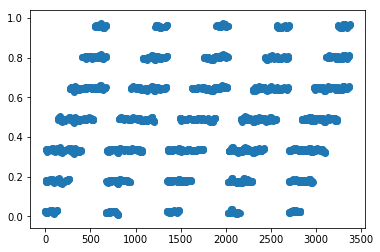

In [298]:
c_x = C_obs.copy()
c_y = C_expect.copy()


minc = np.amin(C_obs, 0)
lenc = np.amax(C_obs, 0) - np.amin(C_obs, 0)

C_obs = (C_obs - minc) / lenc
C_expect = (C_expect - minc) / lenc


# fig = plt.figure(figsize=(15,15))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(C_expect[:,0], C_expect[:,1], C_expect[:,2], marker='o', color='r')
# ax.scatter(C_obs[:,0], C_obs[:,1], C_obs[:,2], marker='^', color='b', s=50)

# C_t = C_expect[C_expect[:, 0] > 6/7 ]
plt.scatter(np.arange(C_expect.shape[0]), C_expect[:,1])
# ax.scatter(C_t[:,0], C_t[:,1], C_t[:,2], marker='^', color='b', s=50)
# ax.scatter(0, 0, 0, marker='^', color='b', s=50)
# ax.scatter(1, 1, 1, marker='^', color='b', s=50)




# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')

# plt.show()



# print(C_expect[0])
# print(c)

(3375, 45)


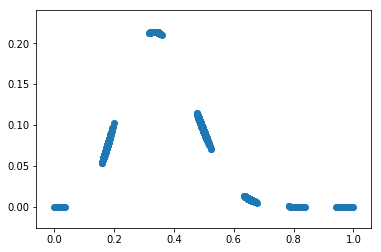

In [299]:
def B(x, n, v):
    return scipy.special.comb(n, v) * x**v * (1-x)**(n-v)


def getbasis(p, n):
    l = []
    for i in range(p.shape[1]):
        for v in range(n):
            l.append(B(p[:,i], n, v))
    l = np.array(l)
    return l.T


n = 15


l = getbasis(C_obs, n)
print(l.shape)

i = 0
# for v in range(n):
plt.scatter(C_obs[:,i], l[:,5+i*n])
# plt.scatter(C_obs[:,i], l[:,1+i*4])
# plt.scatter(C_obs[:,i], l[:,2+i*4])
# plt.scatter(C_obs[:,i], l[:,3+i*4])

# m = np.array([B(d, 3, 0), B(d, 3, 1), B(d, 3, 2), B(d, 3, 3), ])
# print(m)

In [301]:
def getcoeff(obs, expect, n):
    l = basis(obs, n)
    coeff = []
    for i in range(3):
        f = np.linalg.lstsq(l, expect[:,i] - obs[:,i])[0]
        coeff.append(f)
    return np.array(coeff)


def undist(coeff, coords):
    basis = getbasis(coords, 20)
    x_und = (coeff[0] * basis).sum(axis=1)
    y_und = (coeff[1] * basis).sum(axis=1)
    z_und = (coeff[2] * basis).sum(axis=1)
    
    coord_und = np.array([x_und, y_und, z_und]).T
    return coord_und

coeff = getcoeff(C_obs, C_expect, 20)
und = undist(coeff, C_obs)
und = und*lenc
# print(und)
# print(c_x)

print("Corrected: ",np.sqrt(((c_y - c_x - und)**2).sum() / c_y.shape[0]))
print("Original: ", np.sqrt(((c_y - c_x)**2).sum() / c_y.shape[0]))
# print(und)

Corrected:  4.487024622584549
Original:  8.458067665618339


/home/andrew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """
